<a href="https://colab.research.google.com/github/LiShun522/tibame_1224/blob/main/250120_01_%E7%88%AC%E8%9F%B2%E9%AB%98%E9%90%B5(GET%E3%80%81POST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 問號後面參數，需要隱藏，在哪?
```python
GET 沒有小紙條，全部資訊都在上面

POST 有小紙條，私密參數

```

POST參數在這 "酬載" 裡面
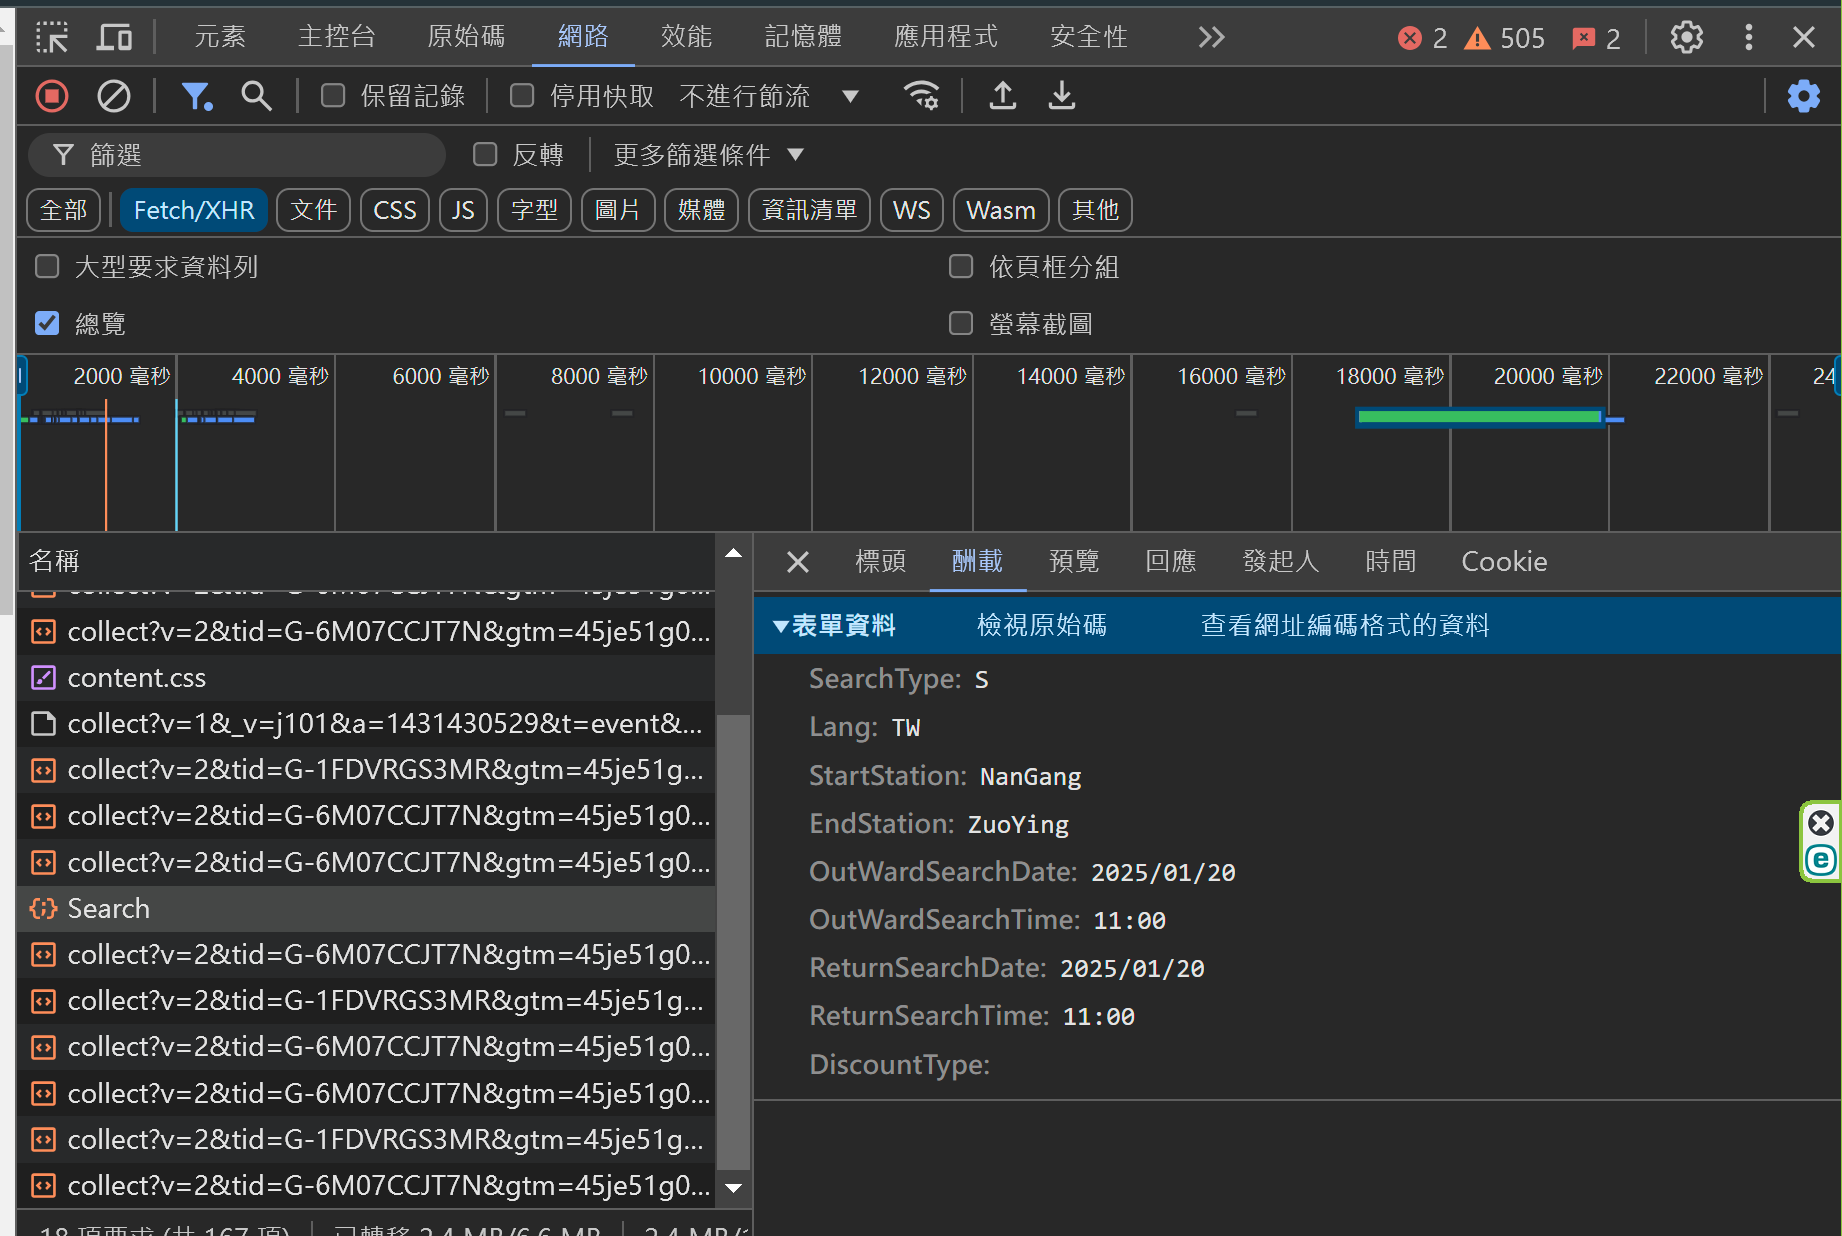

In [ ]:
# demo一下requests函式庫
import requests
import bs4 as bs
url = "https://www.ptt.cc/bbs/Beauty/index3950.html"
response = requests.get(url)
print(response.status_code)
# 你可以看他當初送出的headers
print(response.request.headers)
print(response.headers)
# !!!!!!!!!!!!!! 記得要用的時候要.text
bs.BeautifulSoup(response.text)

In [ ]:
import json
import requests
import pandas as pd
url = "https://www.thsrc.com.tw/TimeTable/Search"
data = {
    "SearchType": "S",
    "Lang": "TW",
    "StartStation": "NanGang",
    "EndStation": "ZuoYing",
    "OutWardSearchDate": "2025/01/20",
    "OutWardSearchTime": "11:30",
    "ReturnSearchDate": "2025/01/20",
    "ReturnSearchTime": "11:30",
    "DiscountType":"",
}
h = {
    "user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/131.0.0.0 Safari/537.36 Edg/131.0.0.0"
}
response = requests.post(url, data, headers=h)
# print(response.status_code)
result = json.loads(response.text)


In [ ]:
# json.loads(response.text)
# train number/dtime/desttime/duration
train_data = result["data"]["DepartureTable"]
train_list = train_data["TrainItem"]
for t in train_list:
  train_number = t["TrainNumber"]
  train_depart_Time = t["DepartureTime"]
  train_dest= t["DestinationTime"]
  train_duration = t["Duration"]
  print(
      train_number,
      train_depart_Time,
      train_dest,
      train_duration
  )

df = pd.json_normalize(train_list)
df.to_csv("0120火車", encoding="utf-8")

0803 06:15 08:40 02:25
1103 06:35 08:20 01:45
0603 06:40 08:50 02:10
0805 07:00 09:25 02:25
0109 07:20 09:05 01:45
0609 07:35 09:45 02:10
0205 07:40 09:30 01:50
1305 07:50 10:00 02:10
0809 08:00 10:25 02:25
0613 08:10 10:20 02:10
0207 08:20 10:10 01:50
0615 08:35 10:45 02:10
1209 08:40 10:30 01:50
0813 09:00 11:25 02:25
0619 09:10 11:20 02:10
0117 09:20 11:05 01:45
0621 09:35 11:45 02:10
1213 09:40 11:30 01:50
0817 10:00 12:25 02:25
0625 10:10 12:20 02:10
0121 10:20 12:05 01:45
0627 10:35 12:45 02:10
1311 10:50 13:00 02:10
0821 11:00 13:25 02:25
1631 11:10 13:20 02:10
0125 11:20 13:05 01:45
0633 11:35 13:45 02:10
0825 12:00 14:25 02:25
0129 12:20 14:05 01:45
0639 12:35 14:45 02:10
0829 13:00 15:25 02:25
1643 13:10 15:20 02:10
0133 13:20 15:05 01:45
0645 13:35 15:45 02:10
0833 14:00 16:25 02:25
0649 14:10 16:20 02:10
0137 14:20 16:05 01:45
0651 14:35 16:45 02:10
0837 15:00 17:25 02:25
0655 15:10 17:20 02:10
0141 15:20 17:05 01:45
0657 15:35 17:45 02:10
1321 15:50 18:00 02:10
0841 16:00 